In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dados-historicos-ibovespa.csv", parse_dates=['Data'], date_format="%d.%m.%Y", dayfirst=True, thousands=".", decimal=",")
df_date_as_index = pd.read_csv("dados-historicos-ibovespa.csv", parse_dates=['Data'], date_format="%d.%m.%Y", dayfirst=True, thousands=".", decimal=",", index_col='Data')
display(df)
display(df_date_as_index)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-10-07,132018,131792,132943,131676,"7,70M","0,17%"
1,2024-10-04,131792,131672,131936,131156,"7,05M","0,09%"
2,2024-10-03,131672,133514,133514,131176,"9,82M","-1,38%"
3,2024-10-02,133515,132495,134922,132495,"9,40M","0,77%"
4,2024-10-01,132495,131817,133405,131817,"9,84M","0,51%"
...,...,...,...,...,...,...,...
2722,2013-10-14,54171,53150,54197,52833,"4,09M","1,92%"
2723,2013-10-11,53150,53000,53301,52739,"3,05M","0,29%"
2724,2013-10-10,52997,52550,53133,52512,"4,14M","0,85%"
2725,2013-10-09,52548,52313,52836,51955,"4,21M","0,45%"


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-10-07,132018,131792,132943,131676,"7,70M","0,17%"
2024-10-04,131792,131672,131936,131156,"7,05M","0,09%"
2024-10-03,131672,133514,133514,131176,"9,82M","-1,38%"
2024-10-02,133515,132495,134922,132495,"9,40M","0,77%"
2024-10-01,132495,131817,133405,131817,"9,84M","0,51%"
...,...,...,...,...,...,...
2013-10-14,54171,53150,54197,52833,"4,09M","1,92%"
2013-10-11,53150,53000,53301,52739,"3,05M","0,29%"
2013-10-10,52997,52550,53133,52512,"4,14M","0,85%"


# Análise exploratória

In [3]:
df_date_as_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2727 entries, 2024-10-07 to 2013-10-08
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Último    2727 non-null   int64 
 1   Abertura  2727 non-null   int64 
 2   Máxima    2727 non-null   int64 
 3   Mínima    2727 non-null   int64 
 4   Vol.      2726 non-null   object
 5   Var%      2727 non-null   object
dtypes: int64(4), object(2)
memory usage: 149.1+ KB


In [4]:
df_date_as_index.shape

(2727, 6)

In [5]:
df_date_as_index.describe()

,Último,Abertura,Máxima,Mínima
count,2727.000000,2727.000000,2727.000000,2727.000000
mean,87075.191786,87046.847451,87845.792079,86273.993766
std,28085.590252,28079.846139,28223.829939,27931.727378
min,37497.000000,37501.000000,38031.000000,37046.000000
25%,57717.000000,57707.000000,58169.000000,57238.000000
50%,92875.000000,92780.000000,93987.000000,91600.000000
75%,112073.000000,112068.500000,113108.500000,110974.500000
max,137344.000000,137349.000000,137469.000000,136664.000000


In [6]:
df_date_as_index.corr(numeric_only=True)

,Último,Abertura,Máxima,Mínima
Último,1.000000,0.998979,0.999550,0.999658
Abertura,0.998979,1.000000,0.999582,0.999373
Máxima,0.999550,0.999582,1.000000,0.999414
Mínima,0.999658,0.999373,0.999414,1.000000


In [7]:
df_date_as_index

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-10-07,132018,131792,132943,131676,"7,70M","0,17%"
2024-10-04,131792,131672,131936,131156,"7,05M","0,09%"
2024-10-03,131672,133514,133514,131176,"9,82M","-1,38%"
2024-10-02,133515,132495,134922,132495,"9,40M","0,77%"
2024-10-01,132495,131817,133405,131817,"9,84M","0,51%"
...,...,...,...,...,...,...
2013-10-14,54171,53150,54197,52833,"4,09M","1,92%"
2013-10-11,53150,53000,53301,52739,"3,05M","0,29%"
2013-10-10,52997,52550,53133,52512,"4,14M","0,85%"


In [8]:
print(df.columns)

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')


<Axes: xlabel='Data'>

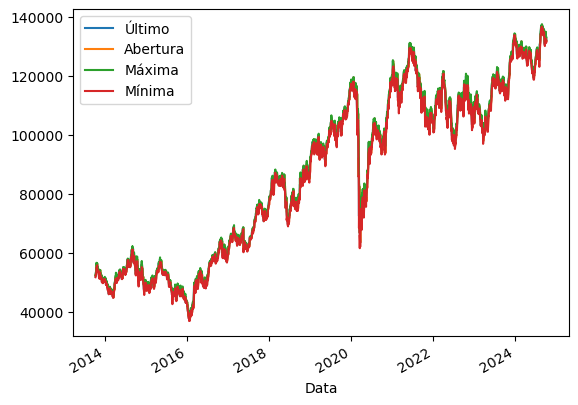

In [9]:
df.plot(x="Data")

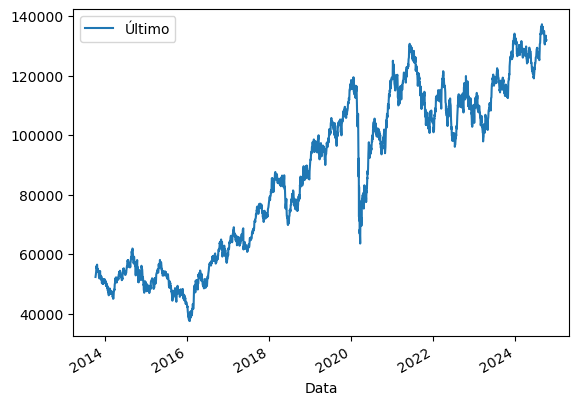

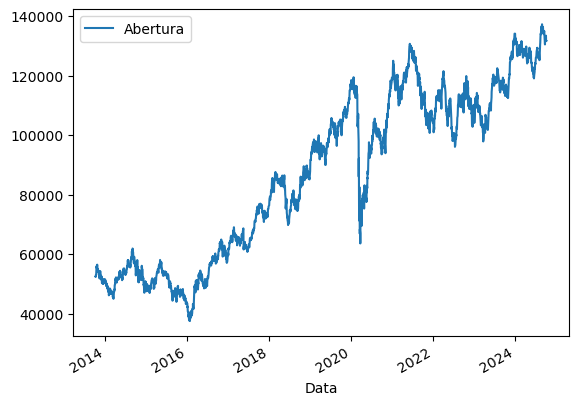

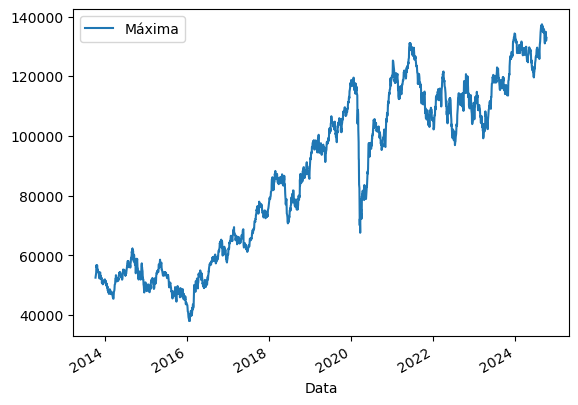

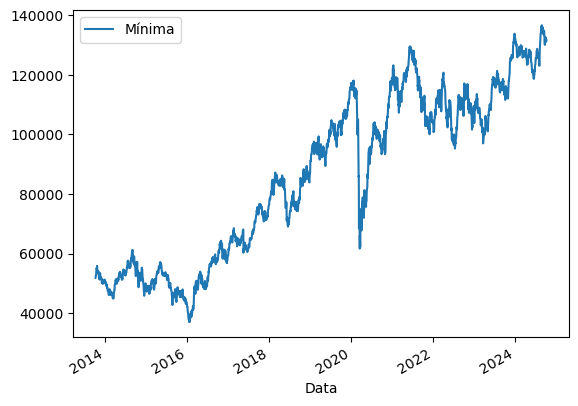

In [10]:
for coluna in list(df.columns):
    if df[coluna].dtype == 'int64':
        df.plot(x="Data", y=coluna)

### Decomposição da Série Temporal

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import acf, pacf

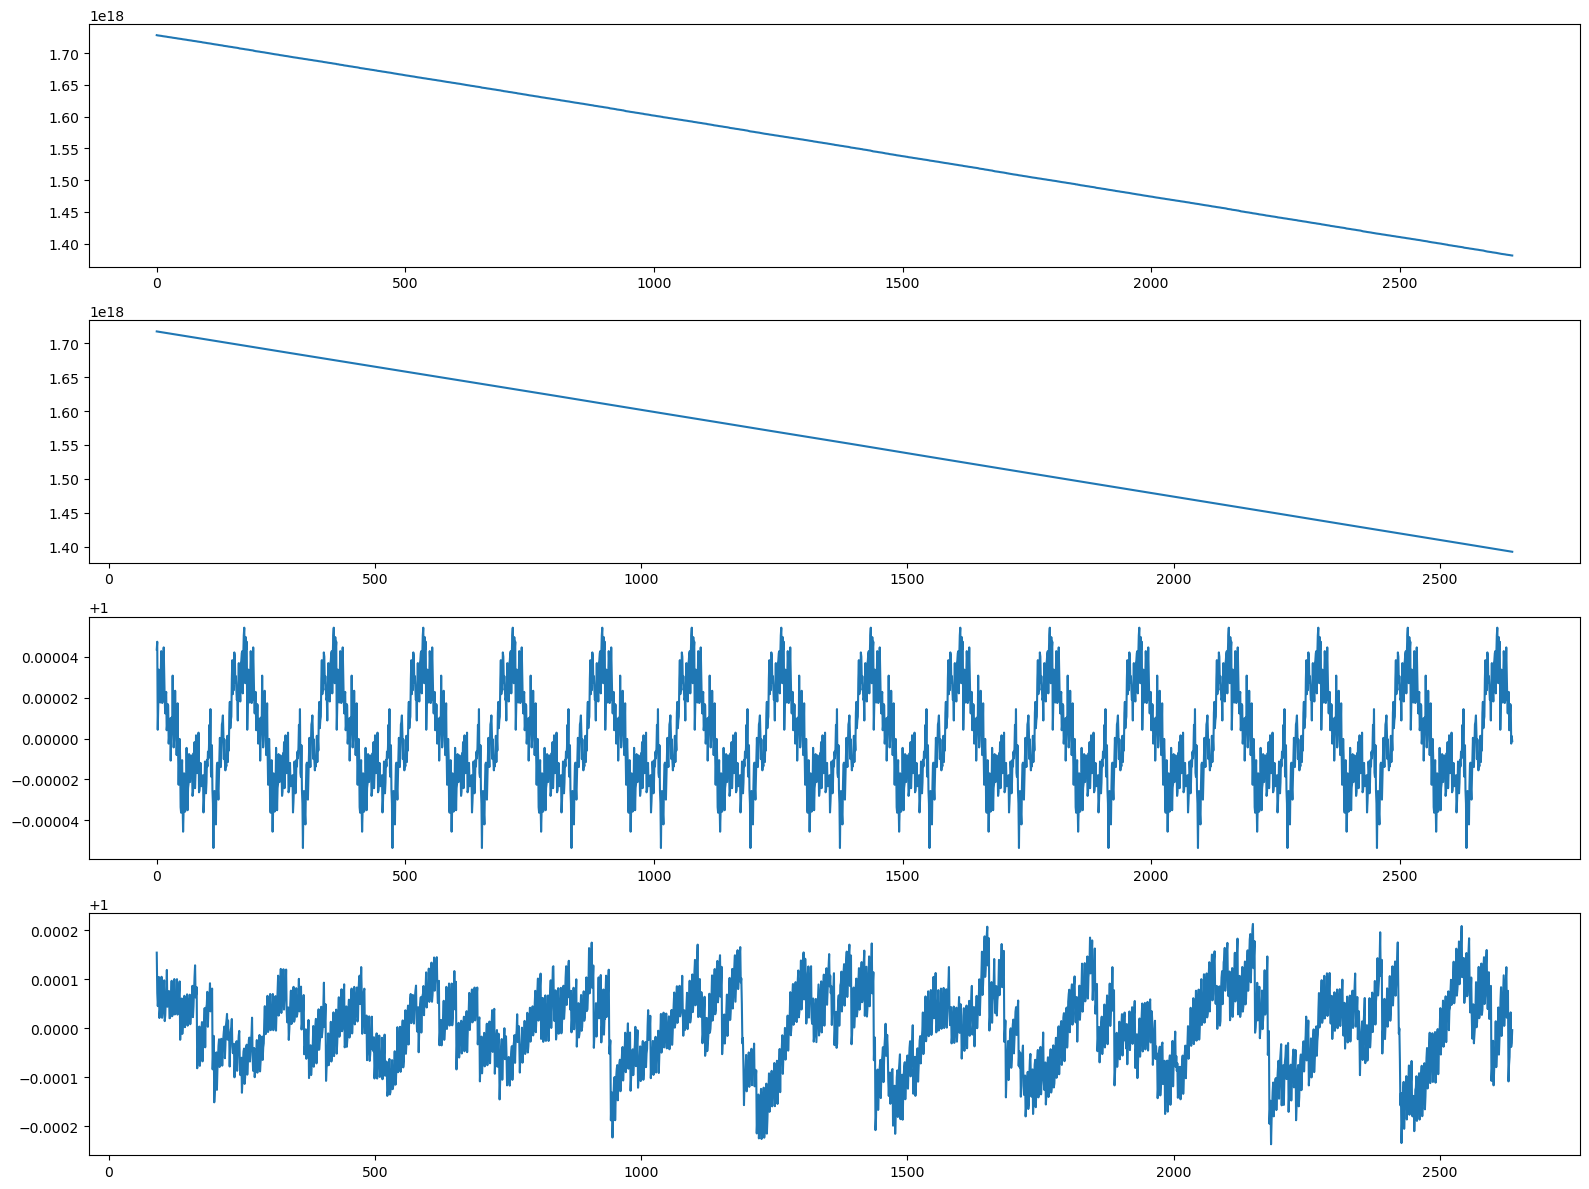

In [12]:
result = seasonal_decompose(df['Data'], model="multiplicative", period=180)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(16,12))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

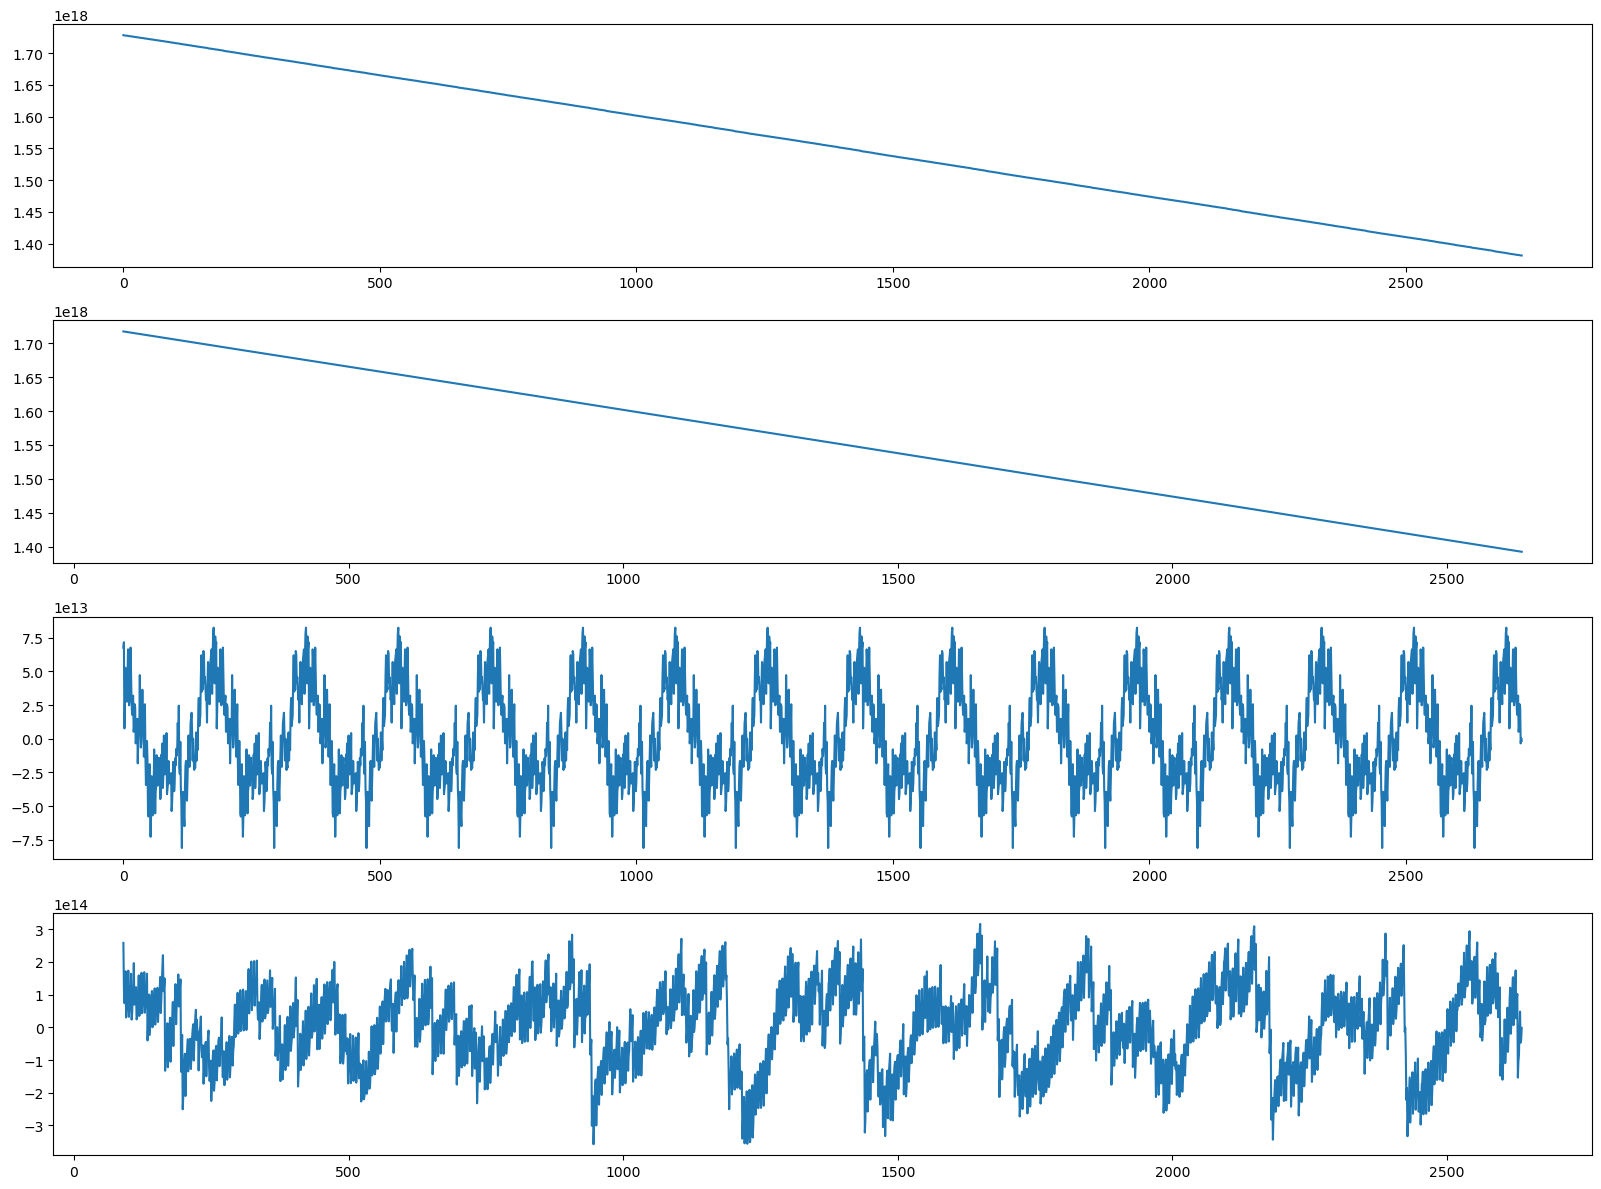

In [13]:
result = seasonal_decompose(df['Data'], model="additive", period=180)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(16,12))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

Modelo multiplicativo parece ser o melhor modelo para análise, pois não há ruídos e os padrões sazonais se repetem constantemente, em uma escala pequeníssima.

### Estacionária ou não estacionária?

In [14]:
# H0 - Hipótese nula - não é estacionária
# H1 - Hipótese alternativa - rejeição da hipótese nula

# p-value = 5%, então rejeitamos H0 com um nível de confiança de 95%

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
sns.set_style('darkgrid')

In [17]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-10-07,132018,131792,132943,131676,"7,70M","0,17%"
1,2024-10-04,131792,131672,131936,131156,"7,05M","0,09%"
2,2024-10-03,131672,133514,133514,131176,"9,82M","-1,38%"
3,2024-10-02,133515,132495,134922,132495,"9,40M","0,77%"
4,2024-10-01,132495,131817,133405,131817,"9,84M","0,51%"


In [18]:
x = df['Último'].values

In [19]:
result = adfuller(x)

print("Teste ADF")
print(f"Teste estatístico: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Valores críticos: ")
 
for key, value in result[4].items():
    print(f"t{key}: {value}")

Teste ADF
Teste estatístico: -1.4560160627240204
P-value: 0.5551466355558073
Valores críticos: 
t1%: -3.432757313106893
t5%: -2.862603575802172
t10%: -2.567336176204636


P-value é 55%, então a série é não estacionária. Vamos aplicar transformação logarítimica para tornar ela estacionária.

In [20]:
df.columns

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')

In [21]:
df_date_as_index = df_date_as_index.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], axis=1)

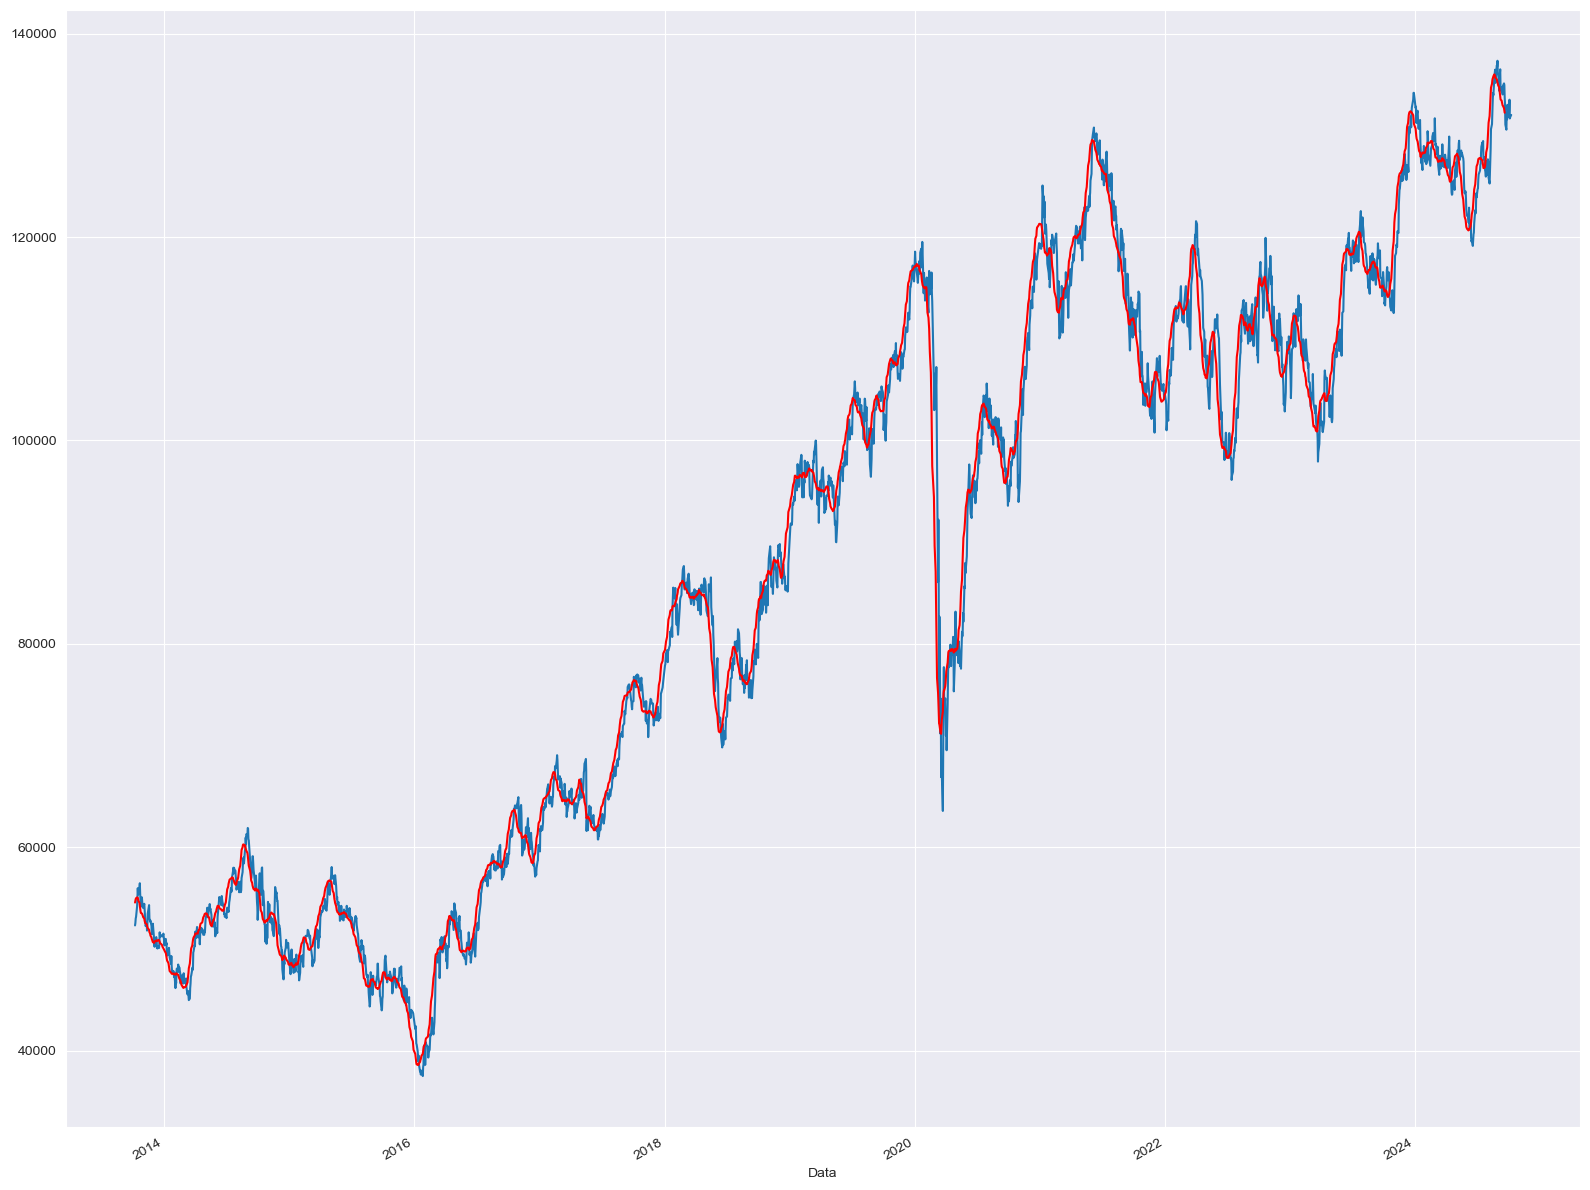

In [22]:
ma = df_date_as_index.rolling(14).mean(numeric_only=True)

f, ax = plt.subplots(figsize=(16, 12))
df_date_as_index.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

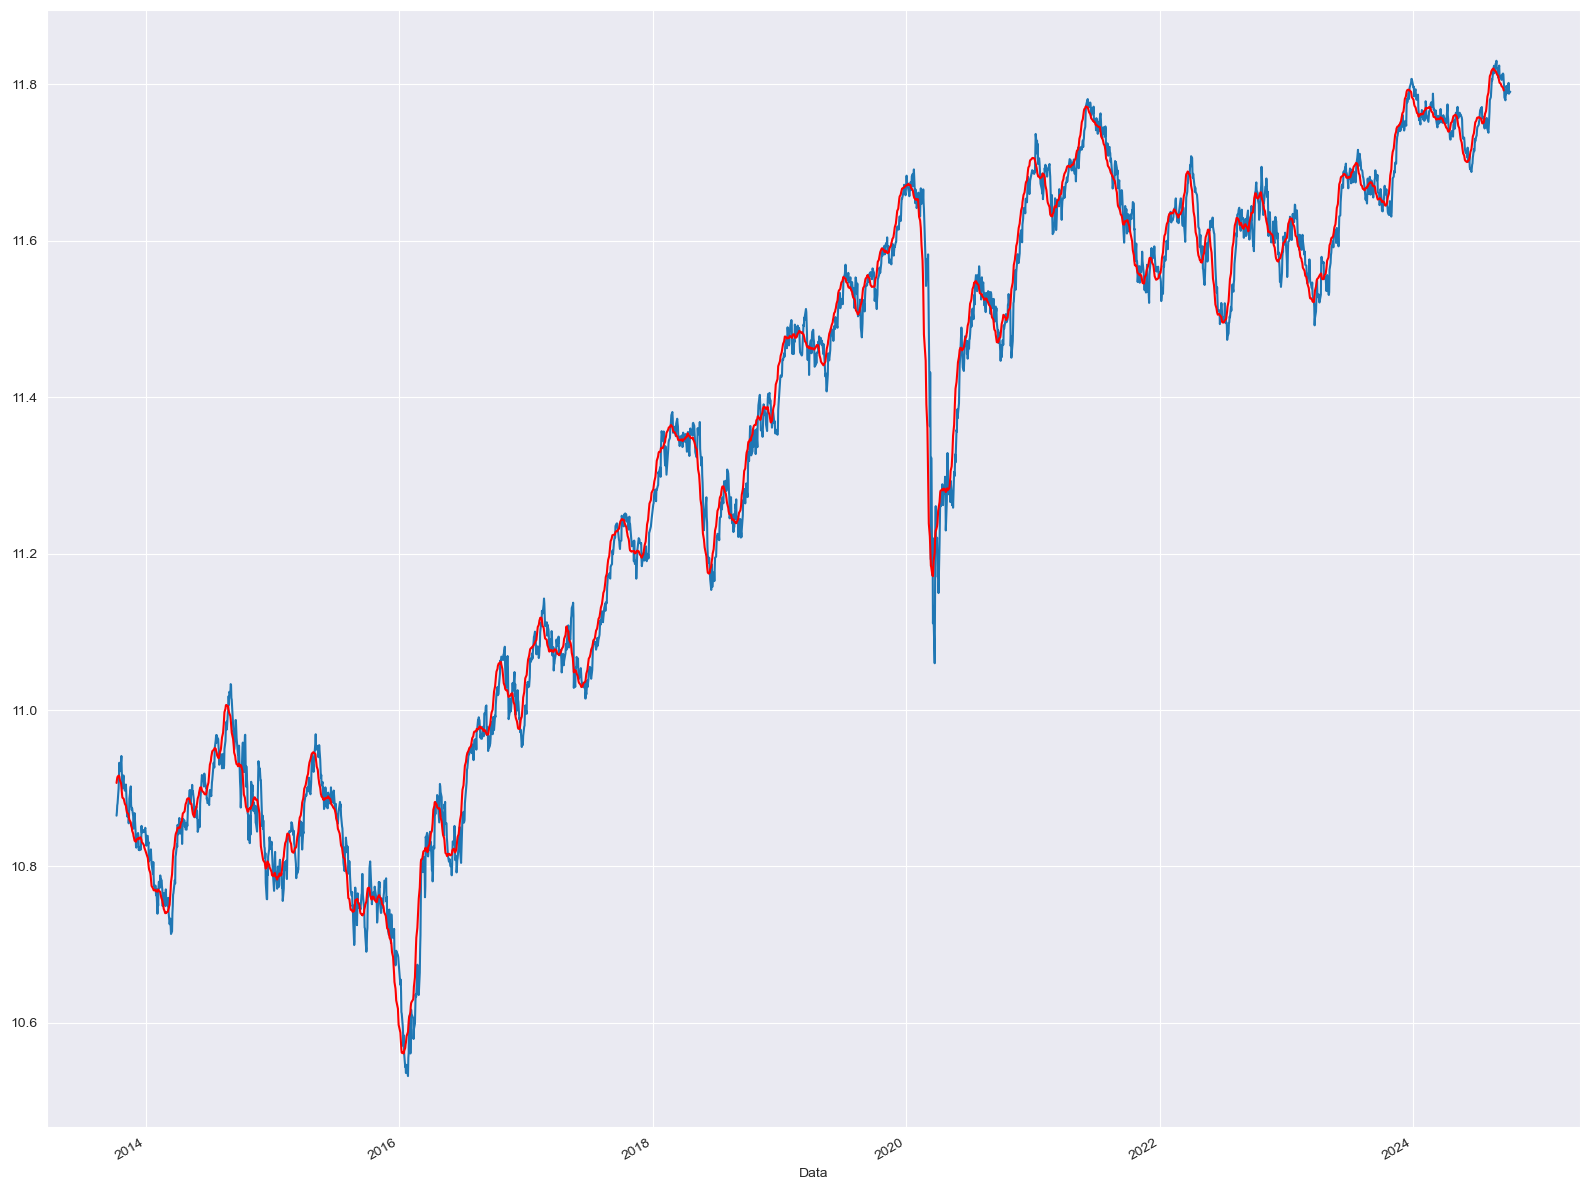

In [23]:
df_log = np.log(df_date_as_index)
ma_log = df_log.rolling(14).mean()

f, ax = plt.subplots(figsize=(16, 12))
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

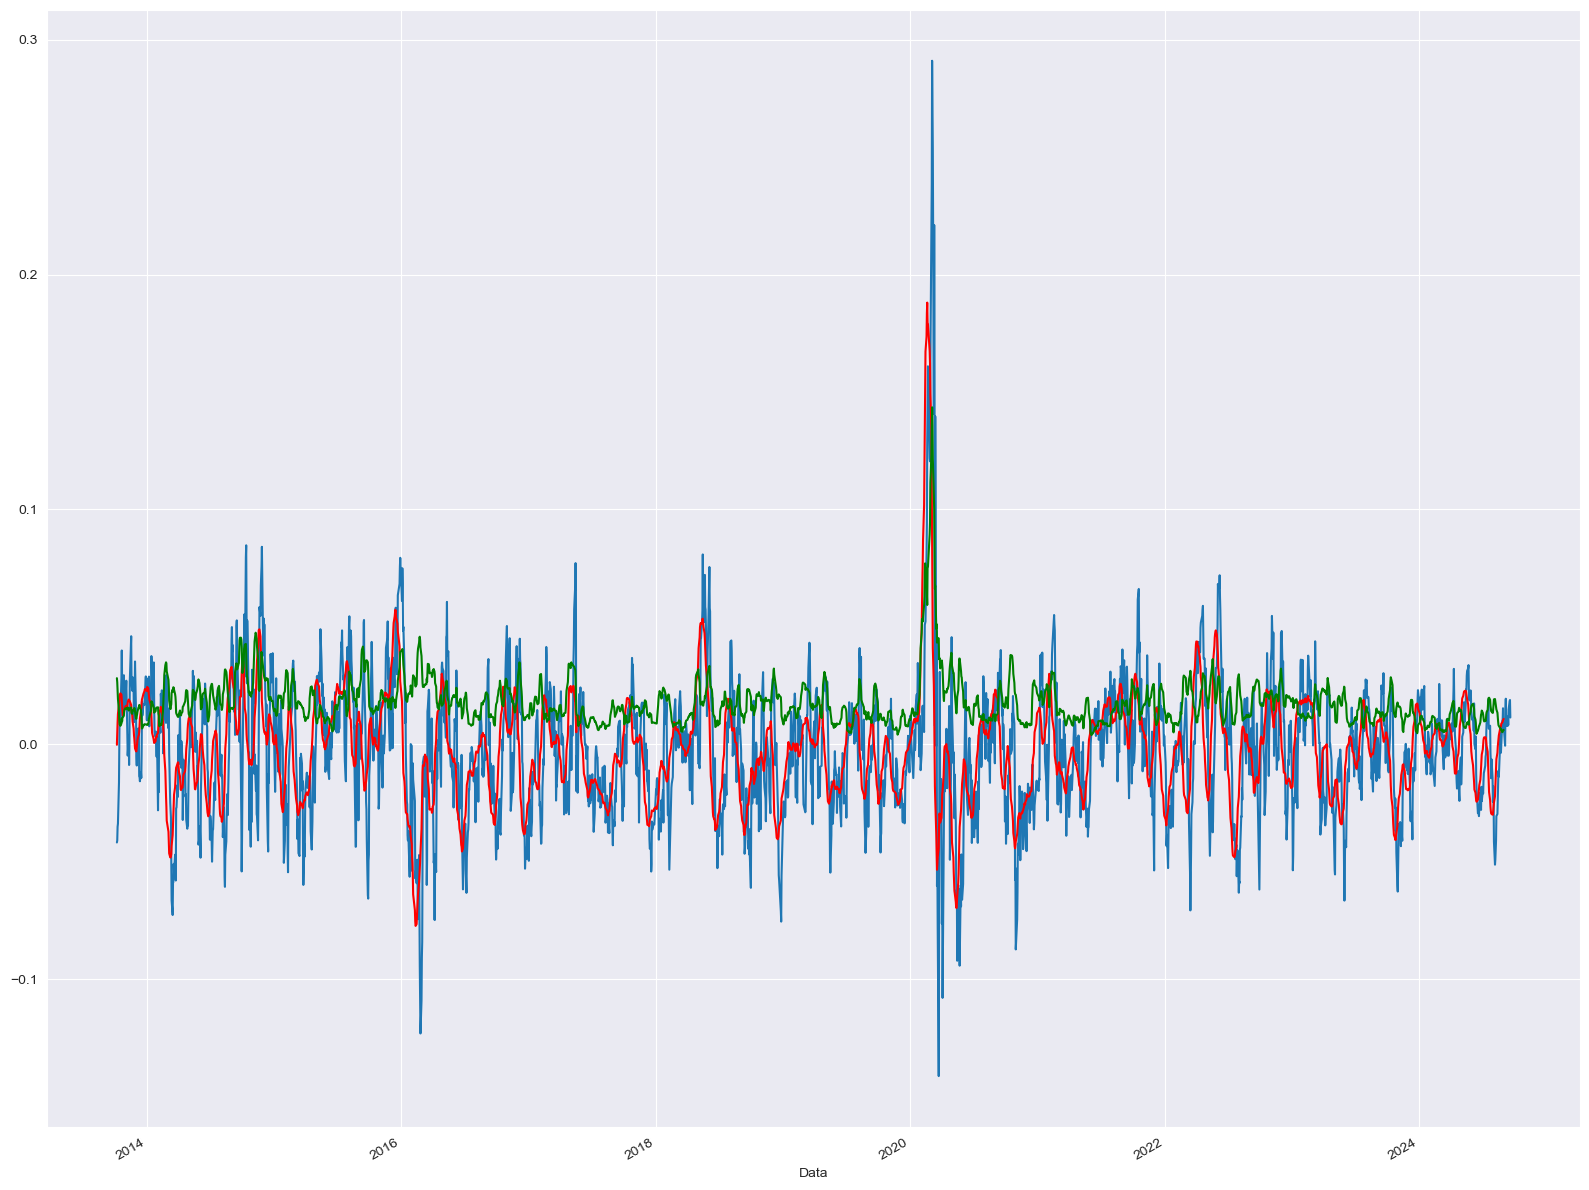

In [24]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(14).mean()

std = df_s.rolling(14).std()

f, ax = plt.subplots(figsize=(16, 12))
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [25]:
df_s

,Último
Data,
2024-09-18,0.011397
2024-09-17,0.018844
2024-09-16,0.018233
2024-09-13,0.014765
2024-09-12,0.008146
...,...
2013-10-14,-0.016280
2013-10-11,-0.033837
2013-10-10,-0.035152


In [26]:
x_s = df_s['Último'].values
result_s = adfuller(x_s)

print("Teste ADF")
print(f"Teste estatístico: {result_s[0]}")
print(f"P-value: {result_s[1]}")
print(f"Valores críticos: ")
 
for key, value in result_s[4].items():
    print(f"t{key}: {value}")

Teste ADF
Teste estatístico: -10.301363001445617
P-value: 3.3655403959300726e-18
Valores críticos: 
t1%: -3.4327751686716304
t5%: -2.8626114613655744
t10%: -2.5673403744927143


A transformação logarítmica aplicada agora parece ser suficiente para tornar a série estacionária. Mas vamos aplicar mais uma diferenciação.

Teste ADF
Teste estatístico: -16.432295965726155
P-value: 2.4719139108527892e-29
Valores críticos: 
t1%: -3.432785102598709
t5%: -2.8626158484711364
t10%: -2.5673427101989885


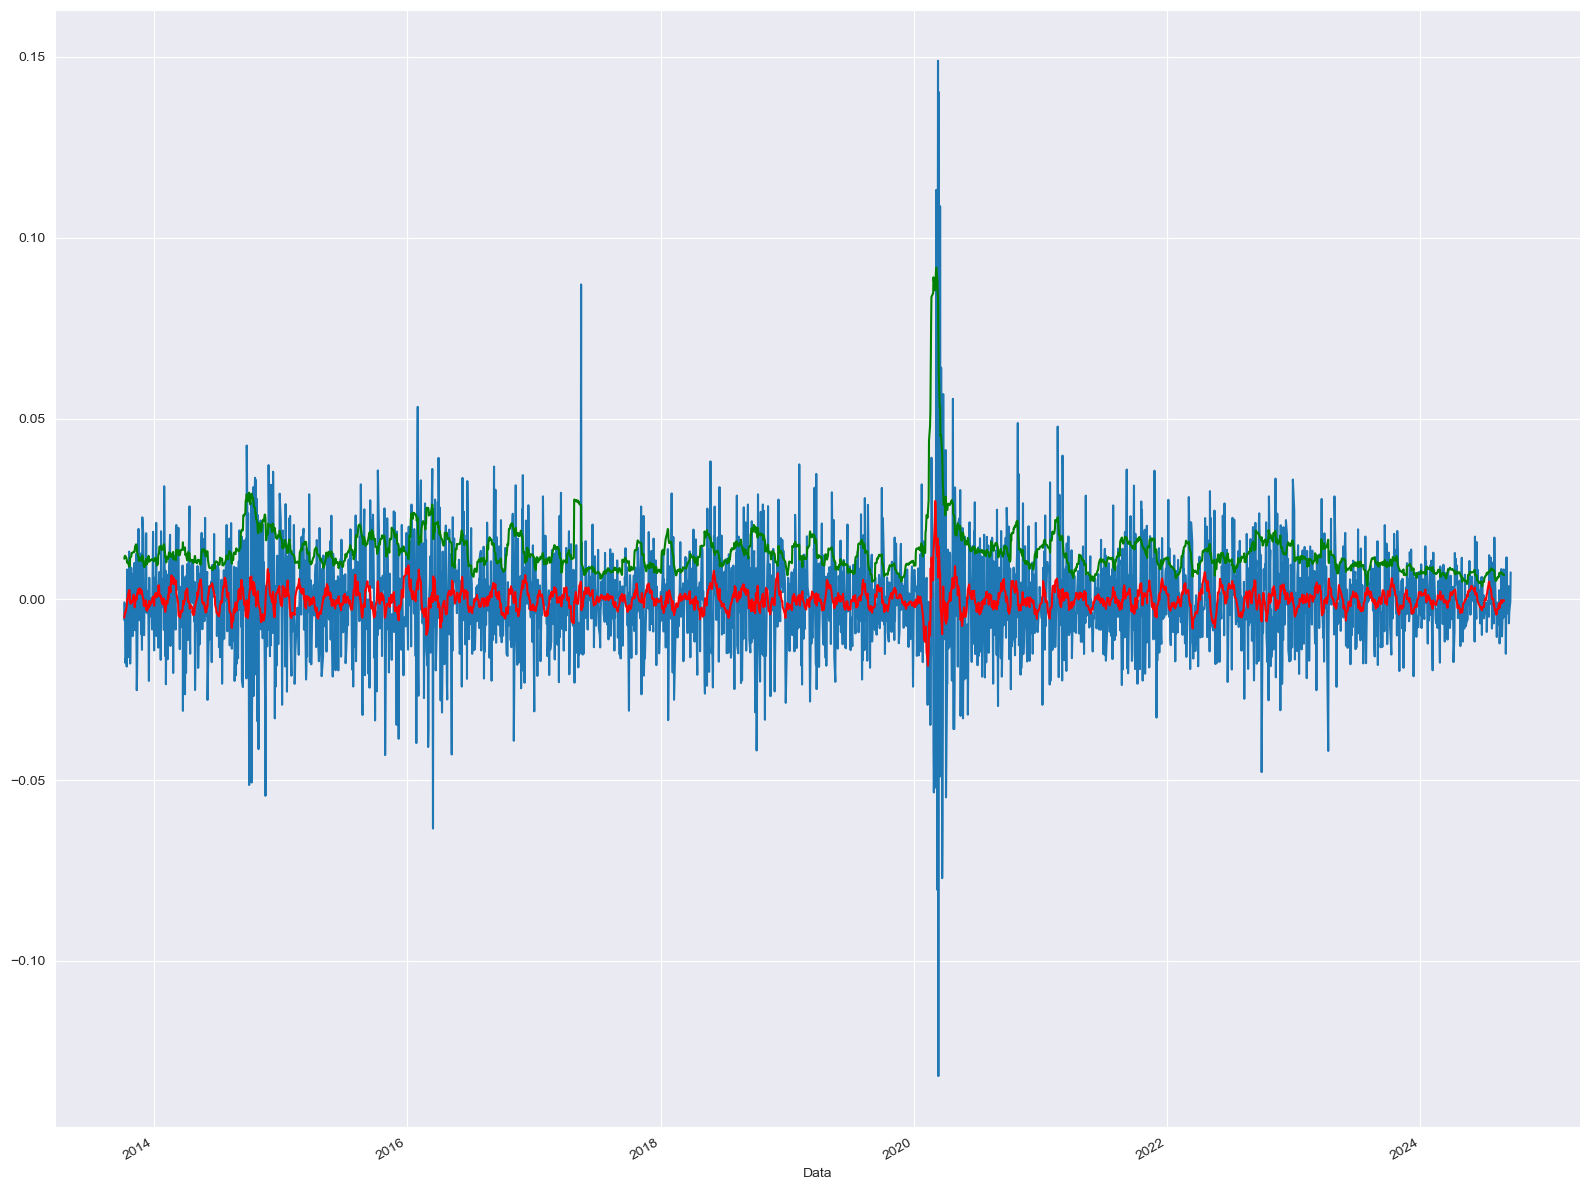

In [27]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(14).mean()

std_diff = df_diff.rolling(14).std()
f, ax = plt.subplots(figsize=(16, 12))
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

x_diff = df_diff['Último'].dropna().values
result_diff = adfuller(x_diff)

print("Teste ADF")
print(f"Teste estatístico: {result_diff[0]}")
print(f"P-value: {result_diff[1]}")
print(f"Valores críticos: ")
 
for key, value in result_diff[4].items():
    print(f"t{key}: {value}")

Agora vamos aplicar ACF e PACF para identificar o valor de MA e AR, e assim ajudar a escolher os parâmetros p e q, do AutoARIMA.

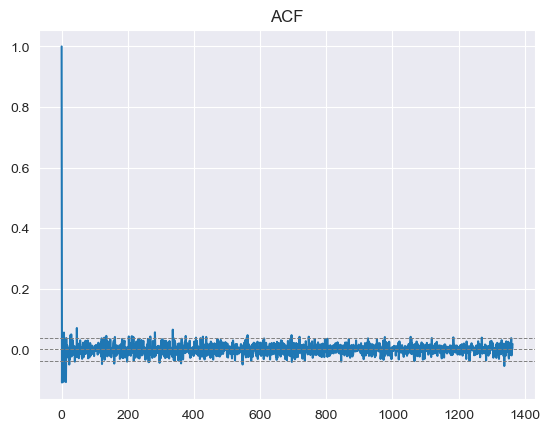

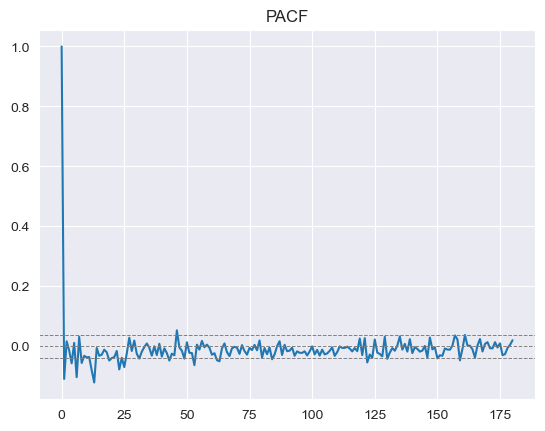

In [28]:
lag_acf = acf(df_diff.dropna(), nlags=1363)
lag_pacf = pacf(df_diff.dropna(), nlags=180)

plt.plot(lag_acf)

plt.axhline(y = -1.96/(np.sqrt(len(df_diff)-1)),linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y = 0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt(len(df_diff)-1)),linestyle='--',color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y = -1.96/(np.sqrt(len(df_diff)-1)),linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y = 0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt(len(df_diff)-1)),linestyle='--',color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

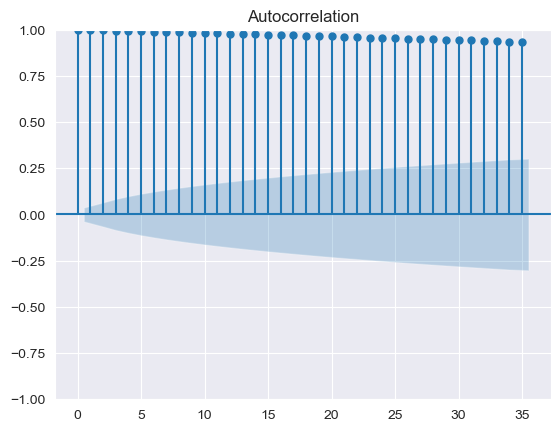

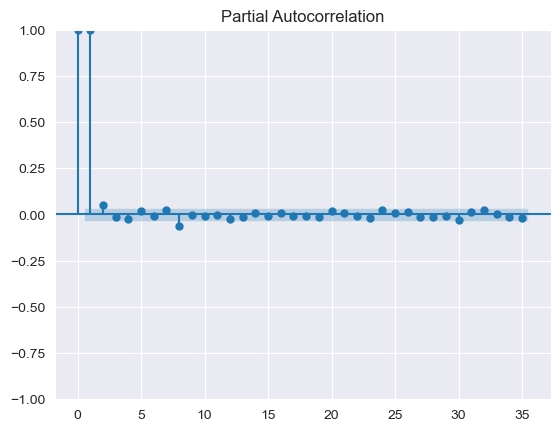

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_date_as_index['Último'])
plot_pacf(df_date_as_index['Último'])
plt.show()

Obtendo P, Q, D

In [30]:
import statsmodels.api as sm

acf_x = sm.tsa.acf(df_date_as_index["Último"], alpha=0.05, nlags=1363)
acf, ci = acf_x[:2]
# identificação do q pelo ponto de interceptação ao 95% com o acf
q = np.where(abs(acf) < (ci[:, 1] - acf))[0][0]

pacf_x = sm.tsa.pacf(df_date_as_index["Último"], alpha=0.05, nlags=180)
pacf, ci = pacf_x[:2]
# identificação do p pelo ponto de interceptação ao 95% com o pacf
p = np.where(abs(pacf) < (ci[:, 1] - pacf))[0][0]

d = 1  # apenas 1 diferenciação foi necessária para tornar a série estacionária

In [31]:
# parâmetros do modelo ARIMA
p, q, d

(3, 250, 1)

Determinando a sazonalidade

In [32]:
import pmdarima as pm

In [33]:
model = pm.auto_arima(
    df_date_as_index["Último"],
    seasonal=True,
    m=6,
    stepwise=True,
)

# Summary of the model's detected parameters
print(model.summary())

# Detected seasonal order
seasonal_order = model.seasonal_order
print(f"Detected Seasonal Order: {seasonal_order}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2727
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -23343.231
Date:                Sat, 12 Oct 2024   AIC                          46700.462
Time:                        16:07:02   BIC                          46741.836
Sample:                             0   HQIC                         46715.417
                               - 2727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -30.0216     94.149     -0.319      0.750    -214.550     154.507
ar.L1         -1.9335      0.029    -65.999      0.000      -1.991      -1.876
ar.L2         -1.0227      0.029    -34.745      0.0

Alternativa:

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df = df.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], axis=1)

In [36]:
df

,Data,Último
0,2024-10-07,132018
1,2024-10-04,131792
2,2024-10-03,131672
3,2024-10-02,133515
4,2024-10-01,132495
...,...,...
2722,2013-10-14,54171
2723,2013-10-11,53150
2724,2013-10-10,52997
2725,2013-10-09,52548


In [37]:
x = df['Data'].values
y = df['Último'].values

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [39]:
from statsforecast.models import AutoARIMA

In [40]:
model_a = StatsForecast(models=[AutoARIMA(season_length=180)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

NameError: name 'StatsForecast' is not defined